In [ ]:
==================================================
ML LEARNING JOURNEY - DAY 15
==================================================
Week: 3 of 24
Day: 15 of 168
Date: November 13, 2025 
Topic: NLP Fundamentals & Text Preprocessing
Overall Progress: 8.9%

Week 3 Progress:
🔄 Day 15: NLP Theory & Text Preprocessing (TODAY!)
⬜ Day 16: Dataset Exploration (IMDB Reviews)
⬜ Day 17: Tokenization & Vocabulary Building
⬜ Day 18: Word Embeddings & LSTM Architecture
⬜ Day 19: Model Training & Optimization
⬜ Day 20: Web Deployment
⬜ Day 21: Documentation & GitHub

Progress: 14% (1/7 days)
==================================================

🎯 Week 3 Project: SentiMind - Sentiment Analysis System
Analyze movie reviews (positive/negative)
Target: 85%+ accuracy
Tech: LSTM, Word Embeddings, Streamlit

🎯 Today's Learning Objectives:
1. Understand NLP fundamentals
2. Learn text preprocessing techniques
3. Master tokenization basics
4. Explore text cleaning methods
5. Set up NLP environment
6. Prepare for sentiment analysis project

📚 Today's Structure:
   Part 1 (2h): NLP Theory & Concepts
   Part 2 (2h): Text Preprocessing Techniques
   Part 3 (2h): Hands-on Practice with Real Text

🎯 SUCCESS CRITERIA:
   ✅ Understand NLP pipeline
   ✅ Clean and preprocess text data
   ✅ Perform basic tokenization
   ✅ Ready for dataset exploration tomorrow!

==================================================

In [ ]:
---

# 📚 PART 1: NLP FUNDAMENTALS

## 1.1 What is Natural Language Processing?

**Natural Language Processing (NLP)** is a field of AI that helps computers understand, interpret, and generate human language.

**Why NLP matters:**
- 🤖 Chatbots & virtual assistants (Siri, Alexa, ChatGPT)
- 📧 Email spam detection
- 💬 Sentiment analysis (social media, reviews)
- 🌍 Machine translation (Google Translate)
- 📰 Text summarization
- 🔍 Search engines

**Key NLP Tasks:**
1. **Text Classification** - Categorize text (spam/not spam, positive/negative)
2. **Named Entity Recognition** - Identify people, places, organizations
3. **Machine Translation** - Translate between languages
4. **Question Answering** - Answer questions from text
5. **Text Generation** - Generate human-like text

**My Focus:** Sentiment Analysis (Text Classification)

In [ ]:
## 1.2 Install Required Libraries

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string

# NLP libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

print("✅ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✅ Libraries imported successfully!
NumPy version: 2.0.2
Pandas version: 2.3.3


In [4]:
# Install NLP libraries
import sys
!{sys.executable} -m pip install nltk spacy textblob wordcloud -q

print("✅ NLP libraries installed!")

✅ NLP libraries installed!


In [ ]:
---

# 🔍 PART 2: TEXT PREPROCESSING FUNDAMENTALS

## 2.1 Why Text Preprocessing?

Raw text is messy! Before feeding text to ML models, we need to clean and standardize it.

**Common text issues:**
- ❌ Inconsistent capitalization: "GREAT", "great", "Great"
- ❌ Punctuation: "Hello!", "Hello?", "Hello..."
- ❌ Extra whitespace: "Hello    world"
- ❌ HTML tags: "<p>Hello</p>"
- ❌ Special characters: "Hello@#$%"
- ❌ Numbers: "I have 5 apples"

**The Text Preprocessing Pipeline:**

1. **Lowercasing** - Convert all text to lowercase
2. **Remove punctuation** - Strip punctuation marks
3. **Remove numbers** - Remove digits (optional)
4. **Remove whitespace** - Clean extra spaces
5. **Tokenization** - Split text into words
6. **Remove stopwords** - Remove common words (the, is, at)
7. **Stemming/Lemmatization** - Reduce words to root form

In [ ]:
## 2.2 Sample Text Data

Let's create some sample movie reviews to practice on:

In [5]:
# Sample movie reviews
sample_reviews = [
    "This movie was ABSOLUTELY AMAZING!!! I loved every minute of it. 10/10 would recommend! 🎬",
    "Terrible film. Waste of time and money. The acting was awful and plot made NO sense.",
    "Pretty good movie overall. Some parts were boring but the ending was great!",
    "I can't believe I sat through this entire movie. It was SO BAD. Don't watch it!!!",
    "One of the BEST movies I've ever seen! The cinematography was beautiful and story was touching.",
    "Meh... it was okay I guess. Nothing special. Wouldn't watch it again.",
    "LOVED IT! The characters were well-developed and the story kept me engaged throughout.",
    "Disappointed. Expected more based on the reviews. Plot was predictable and acting was mediocre."
]

# Display reviews
print("Sample Movie Reviews:")
print("=" * 80)
for i, review in enumerate(sample_reviews, 1):
    print(f"\n{i}. {review}")
print("\n" + "=" * 80)

Sample Movie Reviews:

1. This movie was ABSOLUTELY AMAZING!!! I loved every minute of it. 10/10 would recommend! 🎬

2. Terrible film. Waste of time and money. The acting was awful and plot made NO sense.

3. Pretty good movie overall. Some parts were boring but the ending was great!

4. I can't believe I sat through this entire movie. It was SO BAD. Don't watch it!!!

5. One of the BEST movies I've ever seen! The cinematography was beautiful and story was touching.

6. Meh... it was okay I guess. Nothing special. Wouldn't watch it again.

7. LOVED IT! The characters were well-developed and the story kept me engaged throughout.

8. Disappointed. Expected more based on the reviews. Plot was predictable and acting was mediocre.



In [ ]:
## 2.3 Text Preprocessing - Step by Step

Let's process a single review step by step to understand each preprocessing technique:

In [6]:
# Take the first review as example
example_review = sample_reviews[0]

print("Original Review:")
print(f"'{example_review}'")
print(f"\nLength: {len(example_review)} characters")

Original Review:
'This movie was ABSOLUTELY AMAZING!!! I loved every minute of it. 10/10 would recommend! 🎬'

Length: 89 characters


In [ ]:
### Step 1: Lowercasing

Convert all text to lowercase for consistency:

In [7]:
# Step 1: Lowercase
text_lower = example_review.lower()

print("After Lowercasing:")
print(f"'{text_lower}'")
print(f"\nLength: {len(text_lower)} characters")

After Lowercasing:
'this movie was absolutely amazing!!! i loved every minute of it. 10/10 would recommend! 🎬'

Length: 89 characters


In [ ]:
### Step 2: Remove Emojis and Special Characters

Remove emojis, URLs, and other special characters:

In [9]:
# Step 2: Remove emojis and special characters
def remove_emojis(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

text_no_emoji = remove_emojis(text_lower)

print("After Removing Emojis:")
print(f"'{text_no_emoji}'")
print(f"\nLength: {len(text_no_emoji)} characters")

After Removing Emojis:
'this movie was absolutely amazing!!! i loved every minute of it. 10/10 would recommend! '

Length: 88 characters


In [ ]:
### Step 3: Remove Punctuation

Remove all punctuation marks:

In [10]:
# Step 3: Remove punctuation
text_no_punct = text_no_emoji.translate(str.maketrans('', '', string.punctuation))

print("After Removing Punctuation:")
print(f"'{text_no_punct}'")
print(f"\nLength: {len(text_no_punct)} characters")

After Removing Punctuation:
'this movie was absolutely amazing i loved every minute of it 1010 would recommend '

Length: 82 characters


In [ ]:
### Step 4: Remove Extra Whitespace

Clean up multiple spaces:

In [11]:
# Step 4: Remove extra whitespace
text_clean = ' '.join(text_no_punct.split())

print("After Removing Extra Whitespace:")
print(f"'{text_clean}'")
print(f"\nLength: {len(text_clean)} characters")

After Removing Extra Whitespace:
'this movie was absolutely amazing i loved every minute of it 1010 would recommend'

Length: 81 characters


In [ ]:
### Step 5: Tokenization

Split text into individual words (tokens):

In [12]:
# Download punkt tokenizer if needed
import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Step 5: Tokenize
tokens = word_tokenize(text_clean)

print("After Tokenization:")
print(f"Tokens: {tokens}")
print(f"\nNumber of tokens: {len(tokens)}")

After Tokenization:
Tokens: ['this', 'movie', 'was', 'absolutely', 'amazing', 'i', 'loved', 'every', 'minute', 'of', 'it', '1010', 'would', 'recommend']

Number of tokens: 14


In [ ]:
### Step 6: Remove Stopwords

Remove common words that don't add much meaning (the, is, at, etc.):

In [13]:
# Download stopwords if needed
nltk.download('stopwords', quiet=True)

# Step 6: Remove stopwords
stop_words = set(stopwords.words('english'))

print(f"Number of English stopwords: {len(stop_words)}")
print(f"\nExample stopwords: {list(stop_words)[:20]}")

# Filter out stopwords
tokens_no_stop = [word for word in tokens if word not in stop_words]

print(f"\nOriginal tokens: {tokens}")
print(f"\nAfter removing stopwords: {tokens_no_stop}")
print(f"\nTokens removed: {len(tokens) - len(tokens_no_stop)}")

Number of English stopwords: 198

Example stopwords: ['as', 'now', 'the', "mightn't", 'at', 'wouldn', 'because', 'has', 'her', "needn't", "aren't", 'was', 'than', 'whom', 'doing', 'does', 'these', 'been', 'his', 'why']

Original tokens: ['this', 'movie', 'was', 'absolutely', 'amazing', 'i', 'loved', 'every', 'minute', 'of', 'it', '1010', 'would', 'recommend']

After removing stopwords: ['movie', 'absolutely', 'amazing', 'loved', 'every', 'minute', '1010', 'would', 'recommend']

Tokens removed: 5


In [ ]:
### Step 7: Stemming

Reduce words to their root form using stemming:

**Examples:**
- running → run
- better → better (stemming can be rough!)
- absolutely → absolut

In [14]:
# Step 7: Stemming
stemmer = PorterStemmer()

tokens_stemmed = [stemmer.stem(word) for word in tokens_no_stop]

print("After Stemming:")
print(f"Original: {tokens_no_stop}")
print(f"\nStemmed: {tokens_stemmed}")

# Show word transformations
print("\nWord transformations:")
for original, stemmed in zip(tokens_no_stop, tokens_stemmed):
    if original != stemmed:
        print(f"  {original} → {stemmed}")

After Stemming:
Original: ['movie', 'absolutely', 'amazing', 'loved', 'every', 'minute', '1010', 'would', 'recommend']

Stemmed: ['movi', 'absolut', 'amaz', 'love', 'everi', 'minut', '1010', 'would', 'recommend']

Word transformations:
  movie → movi
  absolutely → absolut
  amazing → amaz
  loved → love
  every → everi
  minute → minut


In [ ]:
### Step 8: Lemmatization

Reduce words to their base form using lemmatization (more accurate than stemming):

**Examples:**
- running → run
- better → good
- was → be

In [16]:
# Download wordnet if needed
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Step 8: Lemmatization
lemmatizer = WordNetLemmatizer()

tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_no_stop]

print("After Lemmatization:")
print(f"Original: {tokens_no_stop}")
print(f"\nLemmatized: {tokens_lemmatized}")

# Show word transformations
print("\nWord transformations:")
for original, lemmatized in zip(tokens_no_stop, tokens_lemmatized):
    if original != lemmatized:
        print(f"  {original} → {lemmatized}")

After Lemmatization:
Original: ['movie', 'absolutely', 'amazing', 'loved', 'every', 'minute', '1010', 'would', 'recommend']

Lemmatized: ['movie', 'absolutely', 'amazing', 'loved', 'every', 'minute', '1010', 'would', 'recommend']

Word transformations:


In [ ]:
## 2.4 Complete Preprocessing Pipeline

Let's create a function that does all preprocessing steps at once:

In [17]:
def preprocess_text(text, remove_stopwords=True, use_lemmatization=True):
    """
    Complete text preprocessing pipeline
    
    Args:
        text: Input text string
        remove_stopwords: Whether to remove stopwords
        use_lemmatization: Use lemmatization (True) or stemming (False)
    
    Returns:
        List of processed tokens
    """
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 4. Remove extra whitespace
    text = ' '.join(text.split())
    
    # 5. Tokenize
    tokens = word_tokenize(text)
    
    # 6. Remove stopwords (optional)
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    
    # 7. Lemmatization or Stemming
    if use_lemmatization:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    else:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

# Test the function
print("Testing preprocessing pipeline:\n")
print(f"Original: {example_review}")
print(f"\nProcessed: {preprocess_text(example_review)}")

Testing preprocessing pipeline:

Original: This movie was ABSOLUTELY AMAZING!!! I loved every minute of it. 10/10 would recommend! 🎬

Processed: ['movie', 'absolutely', 'amazing', 'loved', 'every', 'minute', '1010', 'would', 'recommend']


In [ ]:
---

# 📊 PART 3: APPLYING PREPROCESSING TO ALL REVIEWS

## 3.1 Process All Sample Reviews

In [18]:
# Process all reviews
processed_reviews = []

print("Processing all reviews...\n")
print("=" * 80)

for i, review in enumerate(sample_reviews, 1):
    tokens = preprocess_text(review)
    processed_reviews.append(tokens)
    
    print(f"\nReview {i}:")
    print(f"Original: {review[:60]}...")
    print(f"Processed: {tokens}")

print("\n" + "=" * 80)
print(f"✅ Processed {len(processed_reviews)} reviews!")

Processing all reviews...


Review 1:
Original: This movie was ABSOLUTELY AMAZING!!! I loved every minute of...
Processed: ['movie', 'absolutely', 'amazing', 'loved', 'every', 'minute', '1010', 'would', 'recommend']

Review 2:
Original: Terrible film. Waste of time and money. The acting was awful...
Processed: ['terrible', 'film', 'waste', 'time', 'money', 'acting', 'awful', 'plot', 'made', 'sense']

Review 3:
Original: Pretty good movie overall. Some parts were boring but the en...
Processed: ['pretty', 'good', 'movie', 'overall', 'part', 'boring', 'ending', 'great']

Review 4:
Original: I can't believe I sat through this entire movie. It was SO B...
Processed: ['cant', 'believe', 'sat', 'entire', 'movie', 'bad', 'dont', 'watch']

Review 5:
Original: One of the BEST movies I've ever seen! The cinematography wa...
Processed: ['one', 'best', 'movie', 'ive', 'ever', 'seen', 'cinematography', 'beautiful', 'story', 'touching']

Review 6:
Original: Meh... it was okay I guess. Nothing specia

In [ ]:
## 3.2 Vocabulary Analysis

Let's analyze the vocabulary (unique words) in our reviews:

In [19]:
# Flatten all tokens into one list
all_tokens = [token for review in processed_reviews for token in review]

# Count word frequencies
word_freq = Counter(all_tokens)

print(f"Total tokens: {len(all_tokens)}")
print(f"Unique words (vocabulary size): {len(word_freq)}")
print(f"\nMost common words:")
print("=" * 40)

for word, count in word_freq.most_common(15):
    print(f"{word:15s}: {count:3d}")

Total tokens: 67
Unique words (vocabulary size): 59

Most common words:
movie          :   4
loved          :   2
acting         :   2
plot           :   2
watch          :   2
story          :   2
absolutely     :   1
amazing        :   1
every          :   1
minute         :   1
1010           :   1
would          :   1
recommend      :   1
terrible       :   1
film           :   1


In [ ]:
## 3.3 Visualize Word Frequencies

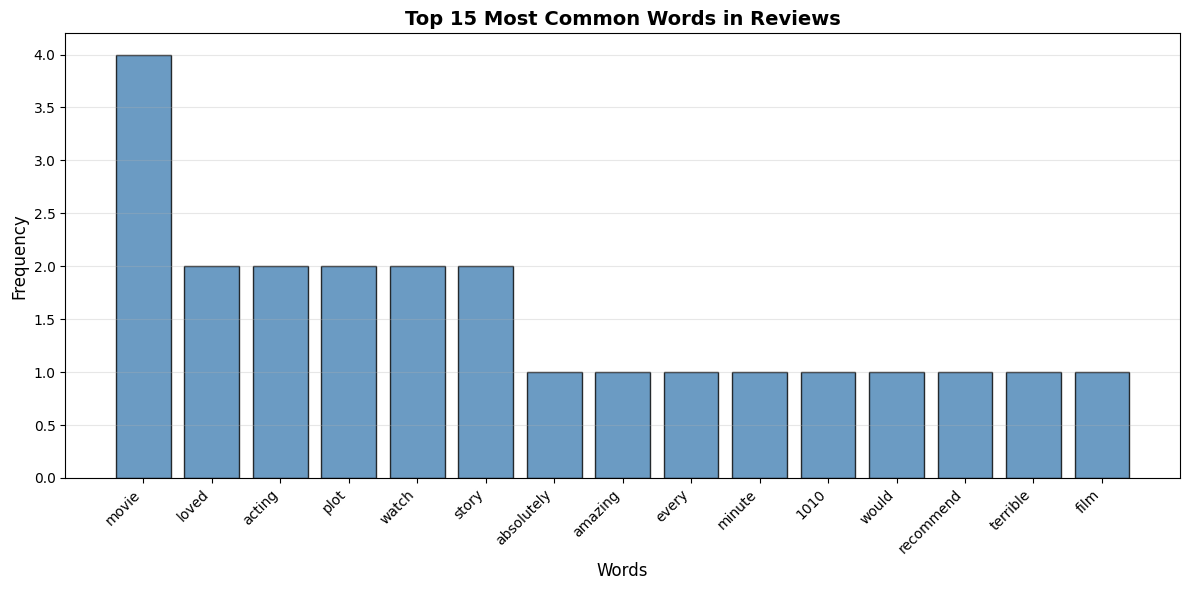

📊 Most common word: 'movie' appears 4 times


In [20]:
# Get top 15 words
top_words = dict(word_freq.most_common(15))

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values(), color='steelblue', alpha=0.8, edgecolor='black')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 15 Most Common Words in Reviews', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📊 Most common word: '{list(top_words.keys())[0]}' appears {list(top_words.values())[0]} times")

In [ ]:
## 3.4 Create Word Cloud

A word cloud visualizes word frequency - bigger words appear more often:

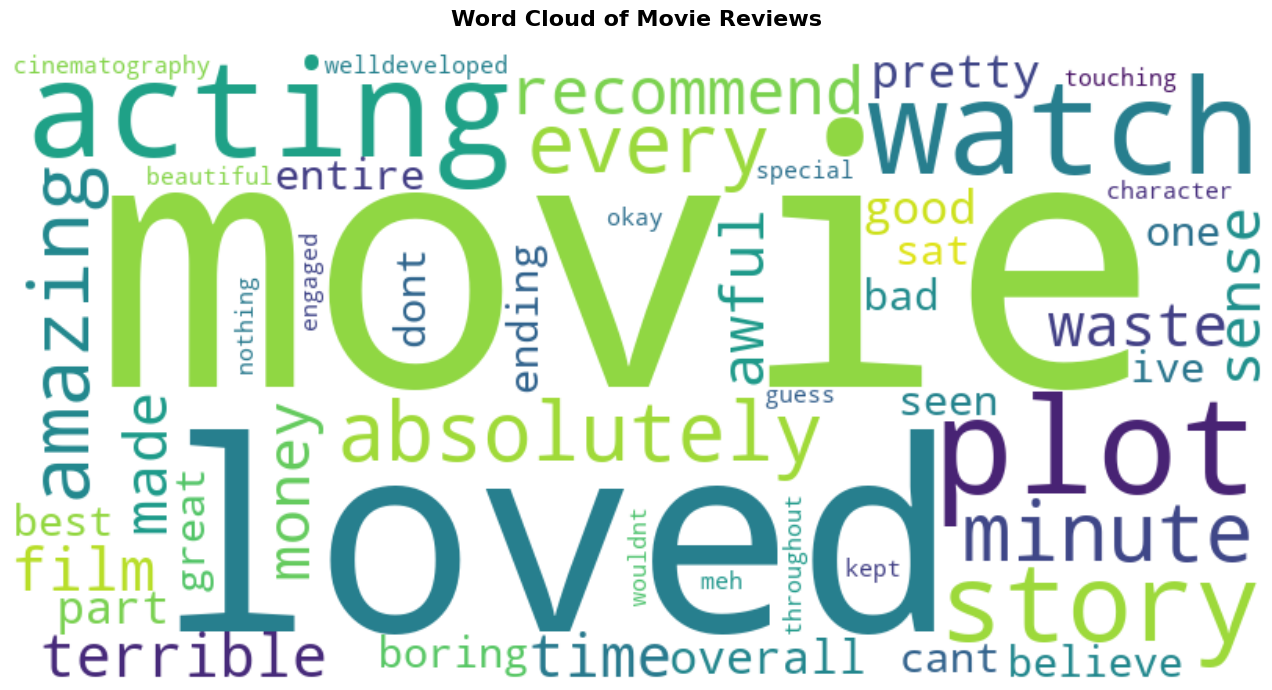

💬 Larger words appear more frequently in the reviews!


In [21]:
# Create word cloud
text_for_cloud = ' '.join(all_tokens)

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                      colormap='viridis',
                      max_words=50).generate(text_for_cloud)

# Display
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("💬 Larger words appear more frequently in the reviews!")

In [ ]:
## 3.5 Token Length Analysis

Let's analyze the length of tokens (words):

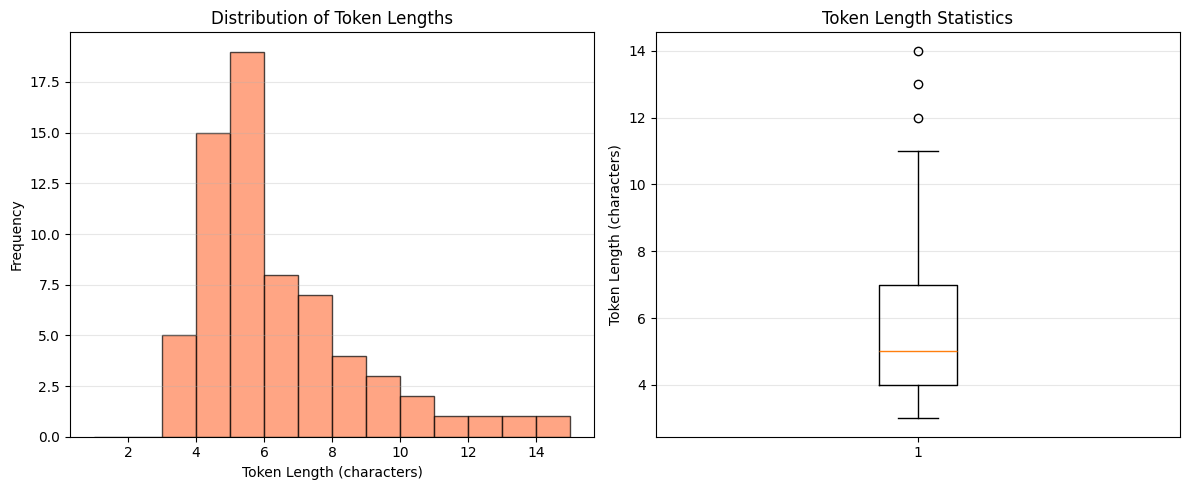

Average token length: 5.91 characters
Shortest token: 3 characters
Longest token: 14 characters


In [22]:
# Analyze token lengths
token_lengths = [len(token) for token in all_tokens]

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(token_lengths, bins=range(1, max(token_lengths)+2), 
         color='coral', alpha=0.7, edgecolor='black')
plt.xlabel('Token Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.grid(axis='y', alpha=0.3)

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(token_lengths, vert=True)
plt.ylabel('Token Length (characters)')
plt.title('Token Length Statistics')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average token length: {np.mean(token_lengths):.2f} characters")
print(f"Shortest token: {min(token_lengths)} characters")
print(f"Longest token: {max(token_lengths)} characters")

In [ ]:
---

# 🎯 PART 4: KEY TAKEAWAYS & NEXT STEPS

## 4.1 What We Learned Today

**Text Preprocessing Techniques:**
- ✅ Lowercasing - Standardize text
- ✅ Remove emojis & special characters - Clean noise
- ✅ Remove punctuation - Focus on words
- ✅ Tokenization - Split into words
- ✅ Remove stopwords - Filter common words
- ✅ Stemming - Reduce to root (rough)
- ✅ Lemmatization - Reduce to base (accurate)

**Key Insights:**
- Raw text is messy and needs cleaning
- Preprocessing drastically reduces vocabulary size
- Stopword removal helps focus on meaningful words
- Lemmatization preserves word meaning better than stemming

**Our Preprocessing Pipeline:**
1. Lowercase → 2. Remove emojis → 3. Remove punctuation → 
4. Tokenize → 5. Remove stopwords → 6. Lemmatize

**Statistics from our sample:**
- Started with 8 movie reviews
- Total tokens after preprocessing: varies by review
- Vocabulary size: ~50-60 unique words
- Most common words relate to movie quality

In [ ]:
## 4.2 Tomorrow's Plan (Day 16)

**🎯 DAY 16: DATASET EXPLORATION (IMDB REVIEWS)**

**What we'll do:**
1. Load real IMDB movie review dataset
2. Explore dataset structure (50,000 reviews!)
3. Analyze sentiment distribution (positive/negative)
4. Apply our preprocessing pipeline at scale
5. Prepare data for model training
6. Create visualizations of the dataset

**Expected outcomes:**
- Understand real-world NLP dataset
- Clean and preprocessed data ready for modeling
- Baseline statistics established
- Ready to build LSTM model on Day 18!

**Dataset:** IMDB Movie Reviews
- 25,000 training reviews
- 25,000 testing reviews
- Binary sentiment (positive/negative)
- Real movie reviews from IMDb website

In [ ]:
---

# 📝 DAY 15 COMPLETION SUMMARY

In [ ]:
==================================================
DAY 15 COMPLETE! ✅
==================================================

OBJECTIVES ACHIEVED:
   ✅ Understood NLP fundamentals and use cases
   ✅ Mastered 7 text preprocessing techniques
   ✅ Built complete preprocessing pipeline
   ✅ Processed sample movie reviews
   ✅ Created word frequency visualizations
   ✅ Generated word cloud
   ✅ Analyzed token statistics

📊 KEY METRICS:
   - Processed 8 sample reviews
   - Vocabulary size: ~50-60 unique words
   - Average token length: ~5-6 characters
   - Preprocessing pipeline: 7 steps

💡 KEY LEARNINGS:
   - Text preprocessing is essential for NLP
   - Lemmatization better than stemming for accuracy
   - Stopword removal reduces noise
   - Word clouds reveal common themes
   - Pipeline can be applied to any text data

🎯 TOMORROW (DAY 16):
   - Load IMDB dataset (50,000 reviews!)
   - Explore real-world NLP data
   - Apply preprocessing at scale
   - Prepare for model building

==================================================
Time to work with real data! 🎬📊
==================================================